<a href="https://colab.research.google.com/github/jonathanl1220/Anime_Classifier/blob/main/anime_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and mounting files


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import *
# from keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report
import itertools
#import imutils
import datetime
import tensorboard
%load_ext tensorboard


In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
cd 'MyDrive/MyDrive/cap_img'

/content/MyDrive/MyDrive/cap_img




# Image generator


In [ ]:
classes = ['Attack_On_Titans', 'Black_Clover', 'Cowboy_Bebob', 'Death_note', 'Demon_slayer', 'Dragon_ball_Z', 'Fairy_tail', 'Full_Metal', 'One_piece', 'bleach']


In [ ]:
batch_size = 10

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory('output2/train', target_size=(224, 224), classes = classes, batch_size= batch_size)
valid_batches = ImageDataGenerator().flow_from_directory('output2/val', target_size=(224, 224), classes= classes, batch_size= batch_size)
test_batches = ImageDataGenerator().flow_from_directory('output2/test', target_size=(224, 224), classes= classes, batch_size= batch_size )

Found 3725 images belonging to 10 classes.
Found 462 images belonging to 10 classes.
Found 475 images belonging to 10 classes.


# Transfer Learning Model Init

In [ ]:
vgg19_model = tf.keras.applications.vgg19.VGG19()


574717952/574710816 [==============================] - 17s 0us/step


In [ ]:
anime_class = Sequential()
for layer in vgg19_model.layers[:-1]:
  anime_class.add(layer)

In [ ]:
for layer in anime_class.layers[:-1]:
    layer.trainable = False


In [ ]:
num_classes = 10
anime_class.add(Dense(num_classes, activation='softmax'))

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)


In [ ]:
anime_class.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
anime_class.fit(train_batches, validation_data=valid_batches, epochs=20, verbose=1)

Epoch 1/20
373/373 [==============================] - 2084s 6s/step - loss: 2.2140 - accuracy: 0.3919 - val_loss: 1.6200 - val_accuracy: 0.4589
Epoch 2/20
373/373 [==============================] - 16s 42ms/step - loss: 0.6263 - accuracy: 0.7898 - val_loss: 1.4828 - val_accuracy: 0.5455
Epoch 3/20
373/373 [==============================] - 16s 42ms/step - loss: 0.1440 - accuracy: 0.9651 - val_loss: 1.4692 - val_accuracy: 0.5909
Epoch 4/20
373/373 [==============================] - 16s 42ms/step - loss: 0.0262 - accuracy: 0.9979 - val_loss: 1.4646 - val_accuracy: 0.6126
Epoch 5/20
373/373 [==============================] - 16s 42ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.4547 - val_accuracy: 0.6299
Epoch 6/20
373/373 [==============================] - 16s 42ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.4825 - val_accuracy: 0.6364
Epoch 7/20
373/373 [==============================] - 16s 42ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.5043 - val_accuracy:

# Image Prediciton Plots

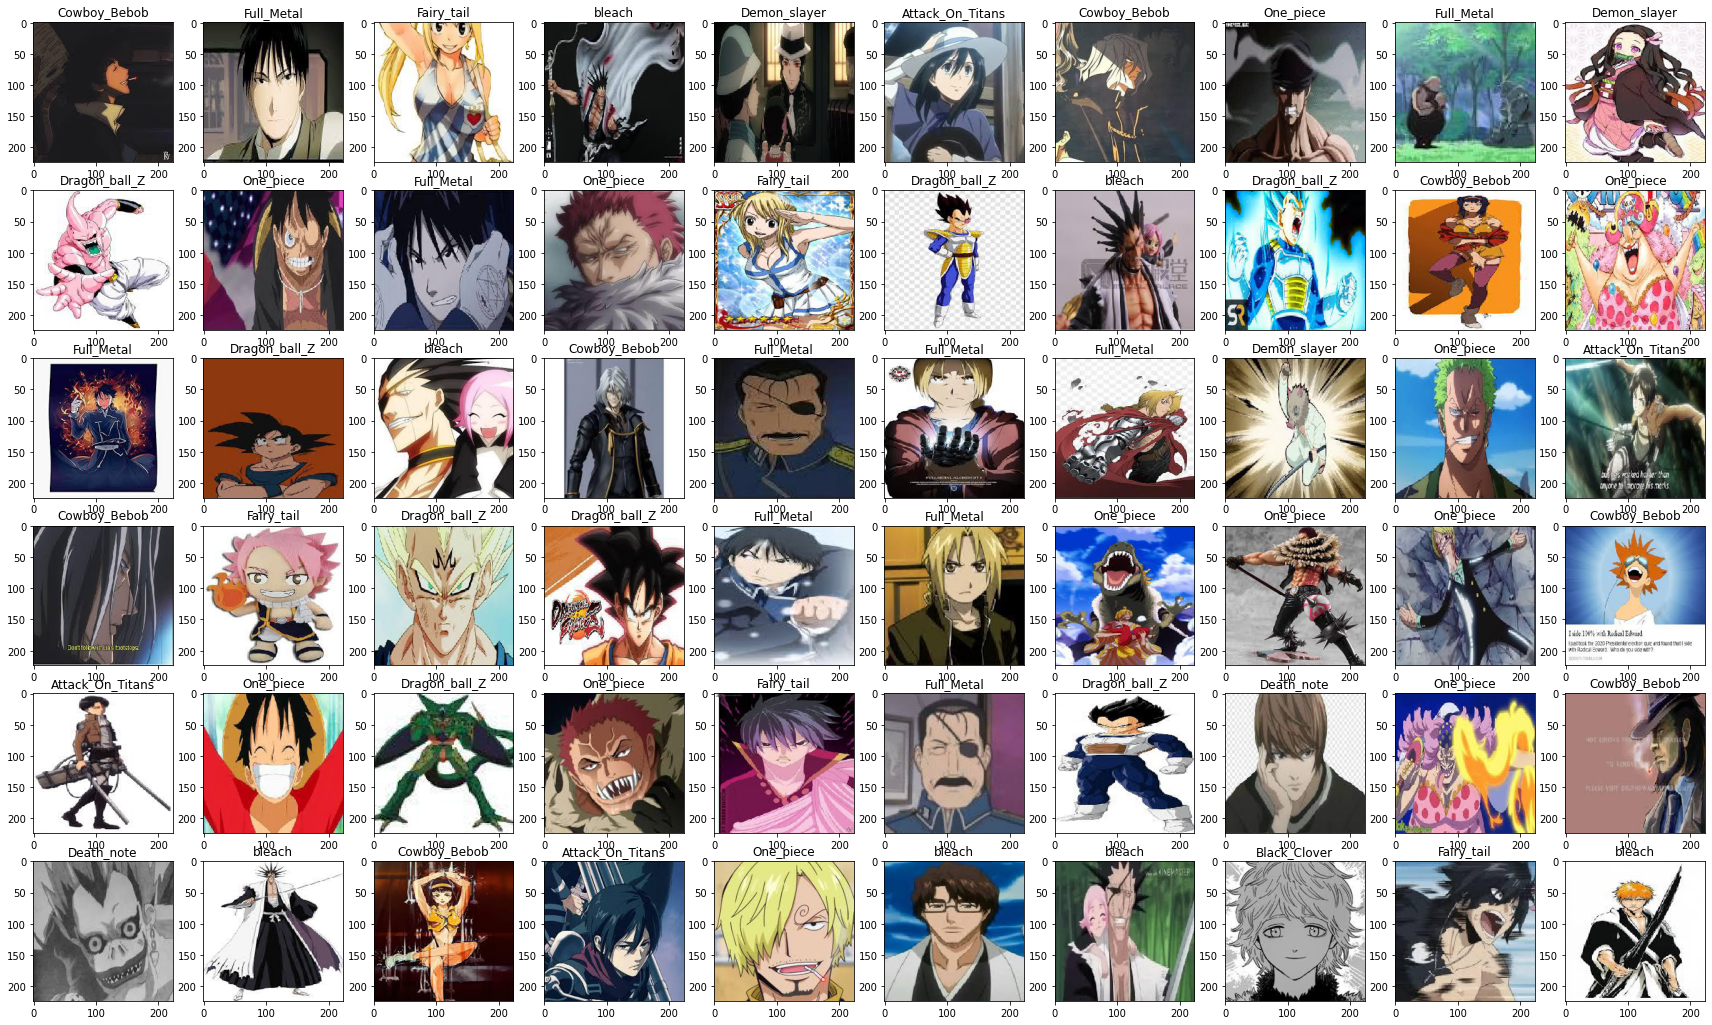

In [ ]:
image_plot(rows=6, batch=train_batches)

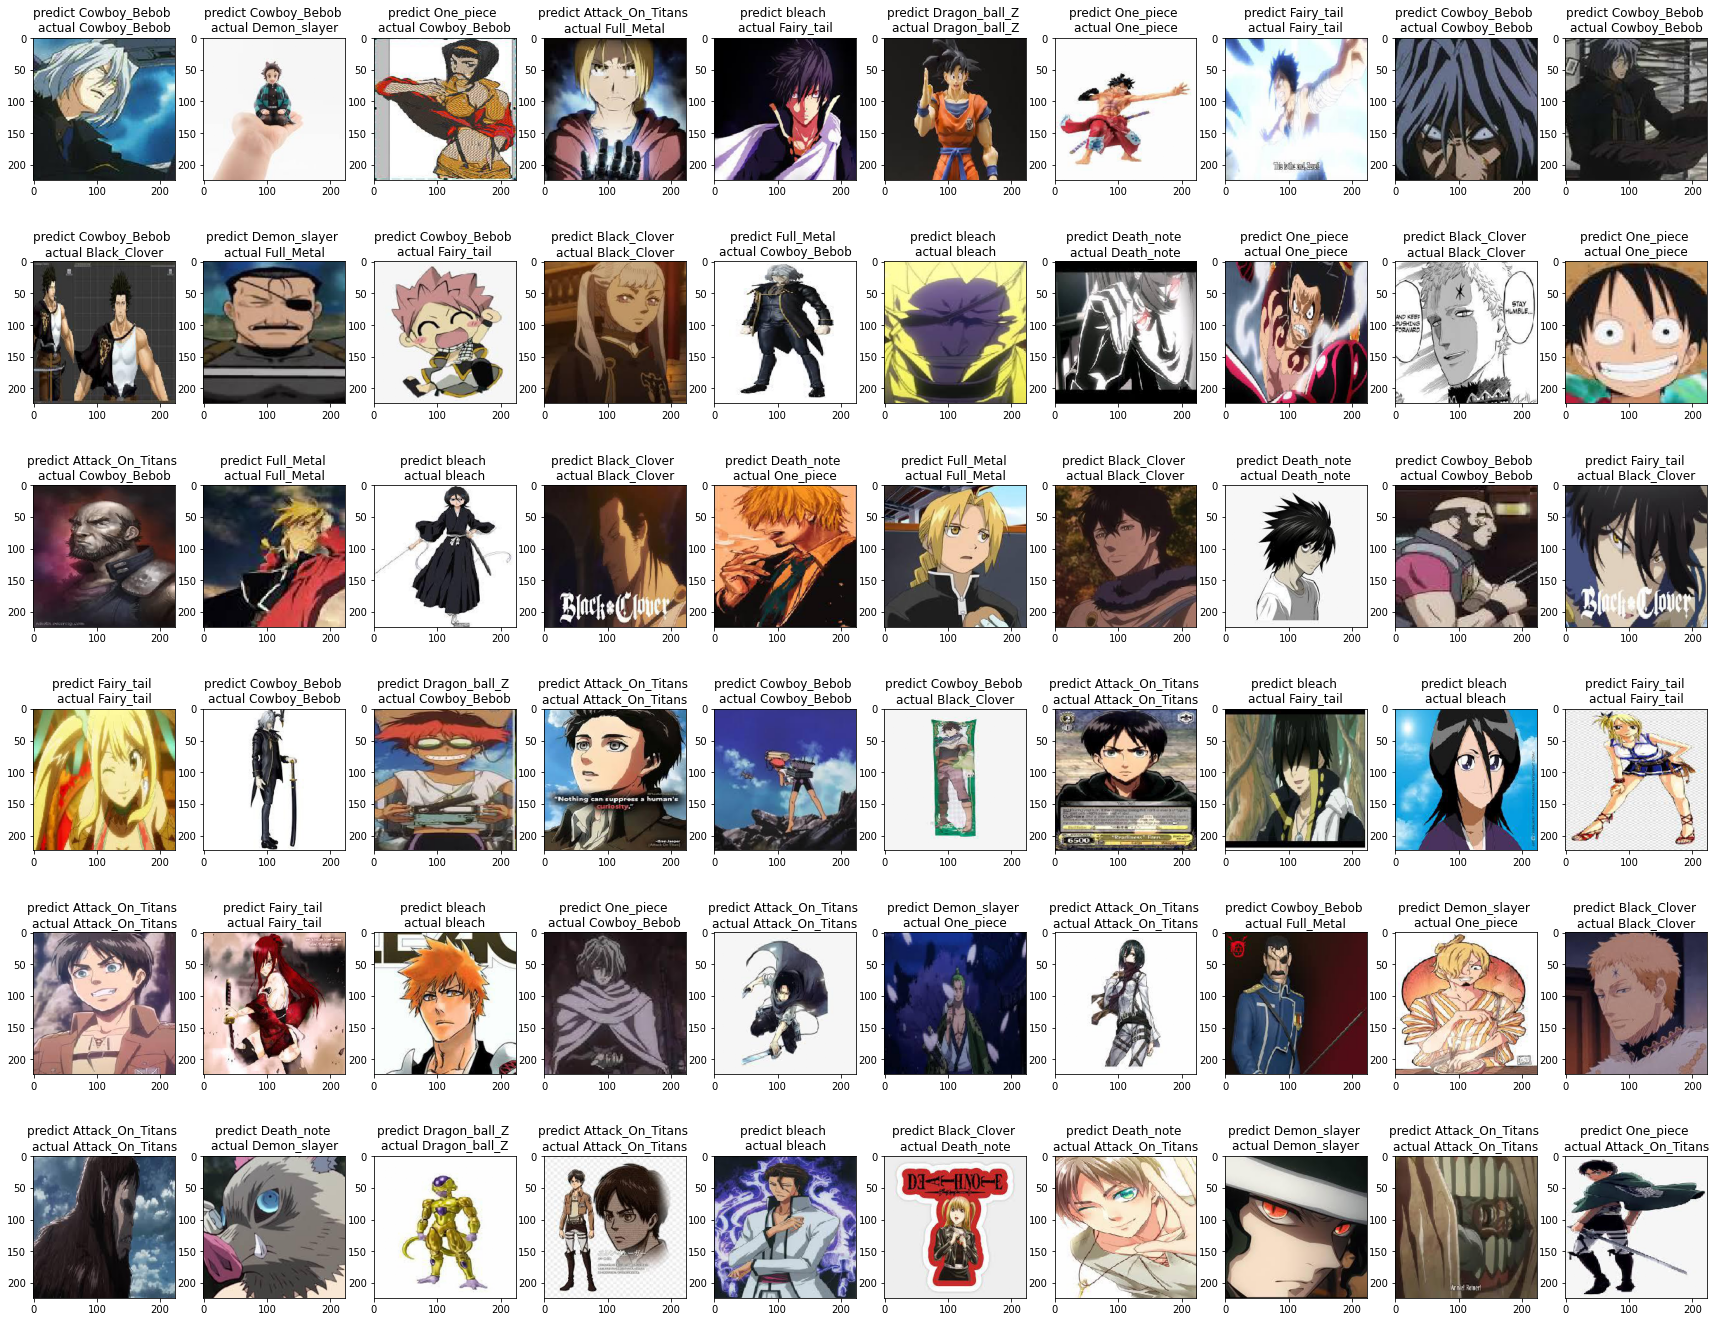

In [ ]:
image_plot_predict(rows=6, batch=test_batches, model=anime_class)

In [ ]:
wrong, ximages, correct = missed(test_batches,anime_class,classes)

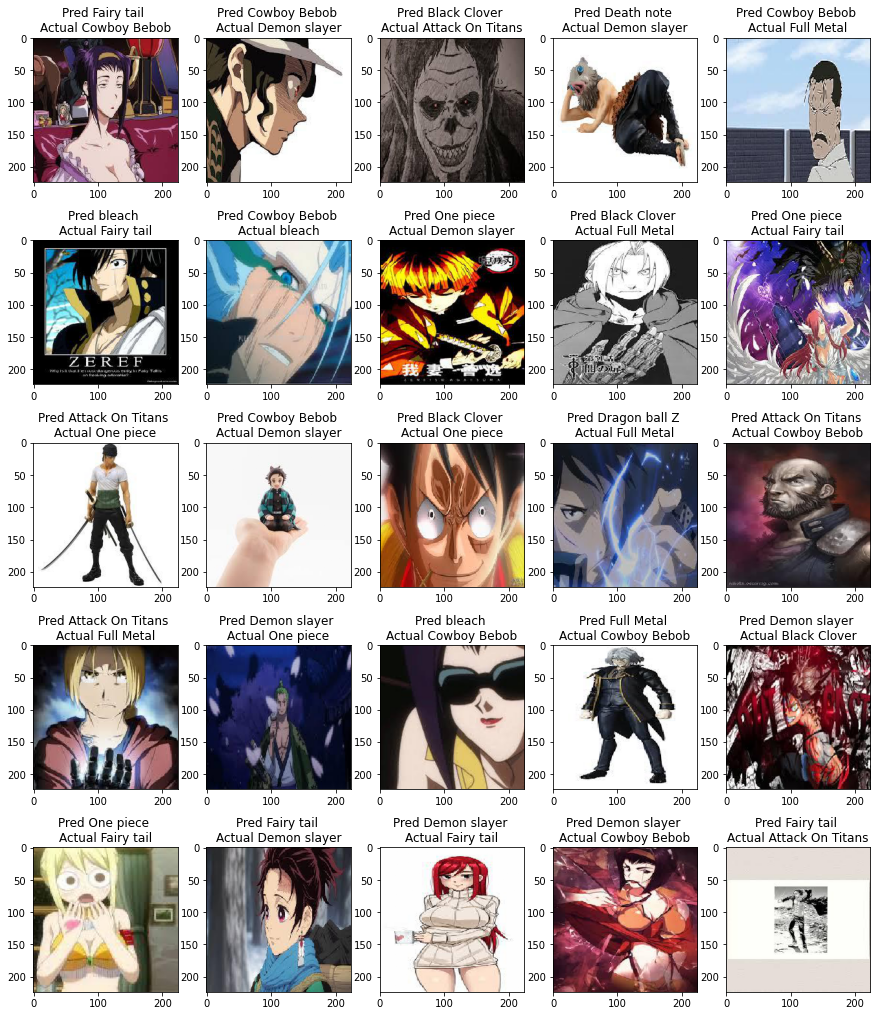

In [ ]:
ig, axs = plt.subplots(5, 5, figsize=(15, 18))
k = 0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(ximages[k]/255)
        title = f"Pred {wrong[k]} \nActual {correct[k]}"
        axs[i,j].set_title(title)
        k+=1

# Confusion Matrix and Heatmap

In [ ]:
pred, actual = result(test_batches,anime_class)

In [ ]:
mat = confusion_matrix(actual,pred,normalize= 'true')

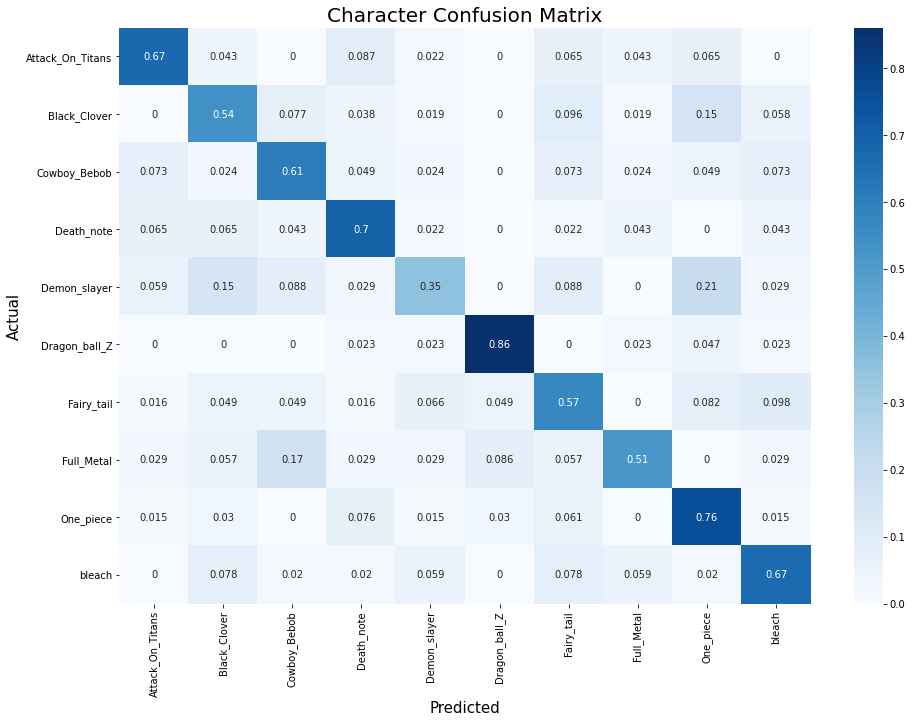

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(mat, annot=True,yticklabels=classes,xticklabels=classes, cmap="Blues")
ax.set_title('Character Confusion Matrix', size =20)
ax.set_ylabel('Actual', size =15)
ax.set_xlabel('Predicted', size =15)

plt.show()

In [ ]:
class_report = classification_report(actual,pred, output_dict= True)

In [ ]:
pd.DataFrame(class_report).T

precision    recall  f1-score     support
0              0.738095  0.673913  0.704545   46.000000
1              0.560000  0.538462  0.549020   52.000000
2              0.568182  0.609756  0.588235   41.000000
3              0.640000  0.695652  0.666667   46.000000
4              0.461538  0.352941  0.400000   34.000000
5              0.822222  0.860465  0.840909   43.000000
6              0.583333  0.573770  0.578512   61.000000
7              0.642857  0.514286  0.571429   35.000000
8              0.641026  0.757576  0.694444   66.000000
9              0.653846  0.666667  0.660194   51.000000
accuracy       0.635789  0.635789  0.635789    0.635789
macro avg      0.631110  0.624349  0.625396  475.000000
weighted avg   0.632827  0.635789  0.632198  475.000000